In [29]:
# Packages
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, cohen_kappa_score, make_scorer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 10)

In [30]:
# Import data

X_train_k =pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_processed.csv')
X_test_k =pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_processed.csv')

# export features for distance-based models
X_train_kone = pd.read_csv('../data/petfinder-adoption-prediction/train/X_train_minmax_scaled_dropped_first.csv')
X_test_kone = pd.read_csv('../data/petfinder-adoption-prediction/train/X_test_minmax_scaled_dropped_first.csv')

# export target
y_train = pd.read_csv('../data/petfinder-adoption-prediction/train/y_train.csv')
y_test = pd.read_csv('../data/petfinder-adoption-prediction/train/y_test.csv')


# Ada_Boost

/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3732
_____________________
Weighted Quadratic Kappa: 0.2519


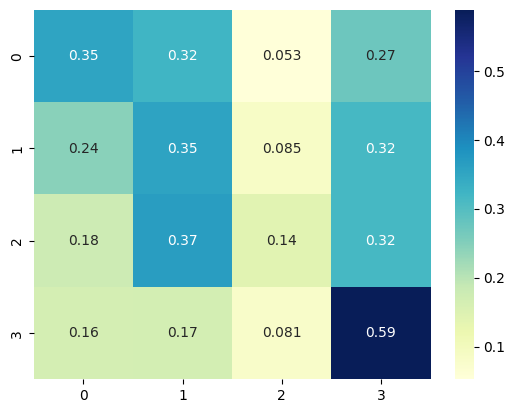

In [32]:
ada1 = AdaBoostClassifier(random_state=42)
ada1.fit(X_train_k, y_train)

y_pred_ada1 = ada1.predict(X_test_k)
our_metrics(y_test, y_pred_ada1, normalize=True) # 0.3758 0.2666

In [33]:
ada_classifier = AdaBoostClassifier(random_state=42)
ada_classifier.get_params()

param_grid = {
    'n_estimators': [3,5,15,25,50,75,100],
    'learning_rate': [0.01,0.1,0.25,0.5,1,1.5,2,5],
    'algorithm': ["SAMME.R","SAMME]"]
}

random_search = RandomizedSearchCV(ada_classifier, param_grid, scoring="accuracy", cv=5, n_jobs=-1,n_iter=300,random_state=42)

random_search.fit(X_train_k, y_train)

/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 112 is smaller than n_iter=300. Running 112 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.v

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME.R', 'SAMME]'],
                                        'learning_rate': [0.01, 0.1, 0.25, 0.5,
                                                          1, 1.5, 2, 5],
                                        'n_estimators': [3, 5, 15, 25, 50, 75,
                                                         100]},
                   random_state=42, scoring='accuracy')

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3814
_____________________
Weighted Quadratic Kappa: 0.2644


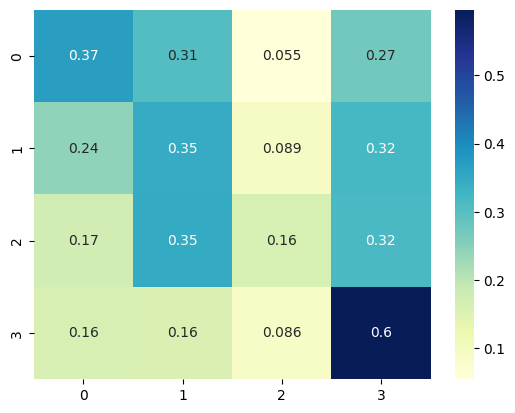

In [34]:
y_pred_rc = random_search.predict(X_test_k)
our_metrics(y_test, y_pred_rc, normalize=True) # 0.3814 0.2639

In [35]:
random_search.best_params_

{'n_estimators': 25, 'learning_rate': 1, 'algorithm': 'SAMME.R'}

In [38]:
ada_classifier_kappa = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [3,5,15,25,50,75,100],
    'learning_rate': [0.01,0.1,0.25,0.5,1,1.5,2,5],
    'algorithm': ["SAMME.R","SAMME]"]
}

kappa_scorer = make_scorer(cohen_kappa_score, weights='quadratic')

random_search_kappa = RandomizedSearchCV(ada_classifier, param_grid, scoring=kappa_scorer, cv=5, n_jobs=-1,n_iter=800,random_state=42)

random_search_kappa.fit(X_train_k, y_train)

/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 112 is smaller than n_iter=800. Running 112 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/janschlautmann/neuefische/ds_capstone_pet_adoptability/.v

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=800, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME.R', 'SAMME]'],
                                        'learning_rate': [0.01, 0.1, 0.25, 0.5,
                                                          1, 1.5, 2, 5],
                                        'n_estimators': [3, 5, 15, 25, 50, 75,
                                                         100]},
                   random_state=42,
                   scoring=make_scorer(cohen_kappa_score, weights=quadratic))

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.3785
_____________________
Weighted Quadratic Kappa: 0.2521


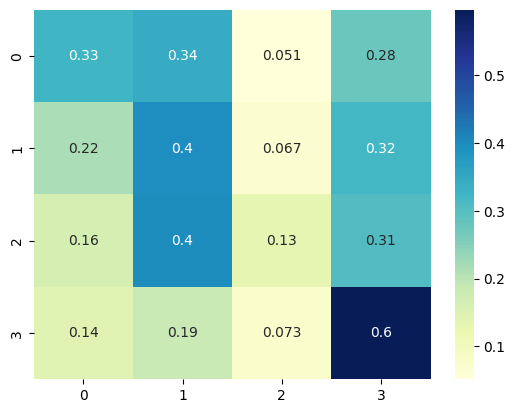

In [39]:
y_pred_rc_kappa = random_search_kappa.predict(X_test_k)
our_metrics(y_test, y_pred_rc_kappa, normalize=True) # 0.3814 0.2639